# Exercise 4 Solutions


In [1]:
from __future__ import print_function  # For Python < 3
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline 


## 1. Approximations to the binomial

For np < 10, large n, the Poisson distribution is a good approximation for the binomial.

* Show analytically that the binomial distribution converges to the Poisson distribution in the limit of large n. (Hint: $e = \lim_{n\to\infty}(1+\frac{1}{x})^x$)


$P(x=k) = \binom{n}{k}p^k (1-p)^{n-k}$

$\lambda = np$

$\lim_{n\to\infty} \frac{n!}{(n-k)!k!} \frac{\lambda}{n}^k (1-\frac{\lambda}{n})^{n-k}$

$\lim_{n\to\infty} \frac{n}{n} \frac{n-1}{n} \bigl ( ... \bigr ) \frac{n-k+1}{n} (1-\frac{\lambda}{n})^{n} (1-\frac{\lambda}{n})^{-k}$

Remembering $e = \lim_{n\to\infty}(1+\frac{1}{x})^x$

$\frac{\lambda}{k!}e^{-\lambda}$



* Keeping $n p$ fixed, plot the binomial probability mass function for an increasing number of observations $n$, comparing in each case to the equivalent Poisson distribution ($\lambda=n p$). For convenience, you should use the relevant functions in ```scipy.stat```.

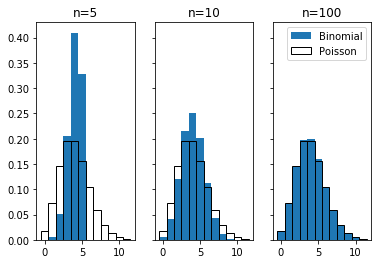

In [2]:
n_trials = [5, 10, 100]
p0 = 0.8
n_p = n_trials[0] * p0
x = range(12)

fh, ax = plt.subplots(1,3, sharey=True)
for idx, nt in enumerate(n_trials):
    p = n_p / nt
    ax[idx].bar(x, stats.binom.pmf(x, nt, p), width=1, alpha=1, label='Binomial')
    ax[idx].bar(x, stats.poisson.pmf(x, n_p), fill=False, width=1, alpha=1, label='Poisson')
    
    ax[idx].set_title('n={}'.format(nt))

    if idx==2:
        plt.legend()

plt.show()

For np > 10, n(1-p) > 10, the discrete binomial distribution can be reasonably approximated by the continuous normal distribution.

* Choose a large n (> 30, with p close to 0.5). To start with, choose n=100 and p=0.45. Plot the binomial pmf, and, with equivalent parameters, the normal pdf 
* Calculate the probability that X >= 55 for each. Don't forget to apply the continuity correction
* What happens to the relative difference as n increases?

Binomial (exact): 0.4911796759527426
Gaussian (approximate): 0.48595290935296537


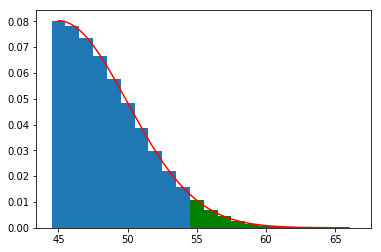

In [3]:
n_trials = 100
p0 = 0.45
mu = n_trials * p0
std = np.sqrt(stats.binom.stats(n_trials, p0, moments='v'))

xd = np.arange(int(mu), int(1.5*mu))
x = np.linspace(xd[0], xd[-1], 200)

x_ch = 55
sel_d = xd >= 55
sel_cont = x >= 55
p_bin = stats.binom.cdf(x_ch, n_trials, p0)/2
p_gauss = stats.norm.cdf(x_ch-0.5, mu, std)/2

print('Binomial (exact):', p_bin)
print('Gaussian (approximate):', p_gauss)


plt.figure()
plt.bar(xd, stats.binom.pmf(xd, n_trials, p0), width=1)
plt.bar(xd[sel_d], stats.binom.pmf(xd[sel_d], n_trials, p0), width=1, color='g')
plt.plot(x, stats.norm.pdf(x, mu, std), 'r')
plt.show()
        

## 2. Random walk

Consider a simple 1D random walk. A person starts at the position $x=0$. With equal probability $p=0.5$, they may take one step forwards or one step backwards, corresponding to a displacement of +1 and -1 respectively.

* Show that for an N step walk, the expected absolute distance from the starting position is given by $\sqrt{N}$.

* Write a function to simulate such a random walk, parameterised by the number of steps. The output should be an array, with the displacement at each step index.

* Plot a single walk.

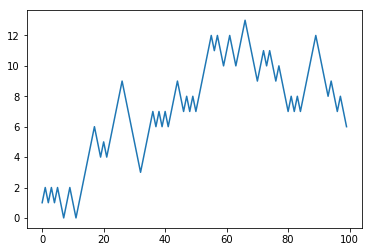

In [4]:
def random_walk(n_steps, p=0.5):
    return np.cumsum(2*(np.random.binomial(size=n_steps, n=1, p=0.5)-0.5))  # Bernoulli

n_steps = 100
w = random_walk(n_steps)

plt.figure()
plt.plot(range(n_steps), w)
plt.show()

* Simulate ~1000 random walks of 500 steps.

* Plot the average distance (rms) of these over the whole set with respect to step index (time). Does the average converge to the expected distance?

* (Optional) sample and plot the running average to show how the convergence improves with number of walks.

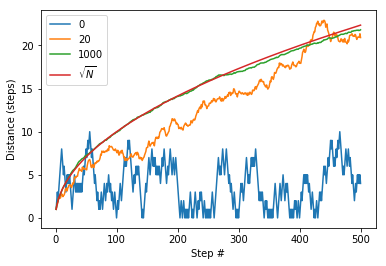

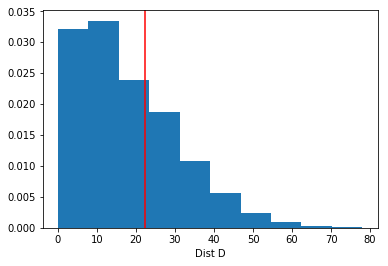

In [5]:
### Bernoulli
n_steps = 500
n_walks = 1000
n = np.arange(n_steps) +1

W = []  # Final distance
A = []  # Running average over whole set
T = 0
for idx in range(n_walks):
    w = np.abs(random_walk(n_steps))
    W.append(w[-1])
    T += w**2
    A.append(np.sqrt(T/(idx+1)))
    
plt.figure()
plt.plot(n, np.array(A).transpose()[:,[0,20,-1]])
plt.plot(n, np.sqrt(n))
plt.legend(['0', '20', '1000', r'$\sqrt{N}$'])
plt.xlabel('Step #')
plt.ylabel('Distance (steps)')

plt.figure()
plt.hist(np.array(W), normed=True)
plt.axvline(np.sqrt(n_steps), color='r')  # Expected distance
plt.xlabel('Dist D')
plt.show()



* Now consider the case $p \ne 0.5$, where the "person" is more likely to step in one direction than another. Find again analytically the expectation and the variance for the (rms) distance travelled in terms of $N$ and $p$.

Expectation: $N  \left|1-2p \right|$

Variance: $N$

* Modify the random_walk function to account for the unequal probability between the directions.

* Run a series of random walks as before, and plot again the histogram of distances travelled. On top of this, plot the Gaussian PDF with the $\mu$ and $\sigma$ parameters as determined above.

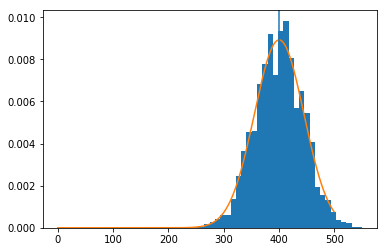

In [6]:
# Plot histogram
n_steps = 2000
n_trials = 5000
p = 0.4

V = []
for n in range(n_trials):
    V.append(np.abs(np.sum(2*(np.random.binomial(size=n_steps, n=1, p=p)-0.5))))
    
plt.figure()
plt.hist(V, 40, normed=True)
plt.plot(range(500), stats.norm.pdf(range(500), loc=n_steps*np.abs(1-2*p), scale=np.sqrt(n_steps)))
plt.axvline(n_steps*(np.abs(1-2*p)))
plt.show()

## 3. Small sample sizes: t-distribution
### 3.1 Compare to normal distribution

Student's t-distributions are interesting for cases where you have few samples and the population variance is unknown, but the underlying distribution of the means can be assumed normal. They are parameterised by the degrees of freedom ("df"), which is usually equal the number of samples minus one. As the number of degrees of freedom increases, the t-distribution converges to the normal distribution.

* Plot the standard t-distribution for several increasing degrees of freedom and compare this to the normal PDF.
* Plot and compare the cumulative distribution functions
* Plot the variance of the t-distribution as a function of degrees of freedom. Compare to the standard normal variance (=1)
* (optional) make a Q-Q plot (see Wiki) and compare the distributions



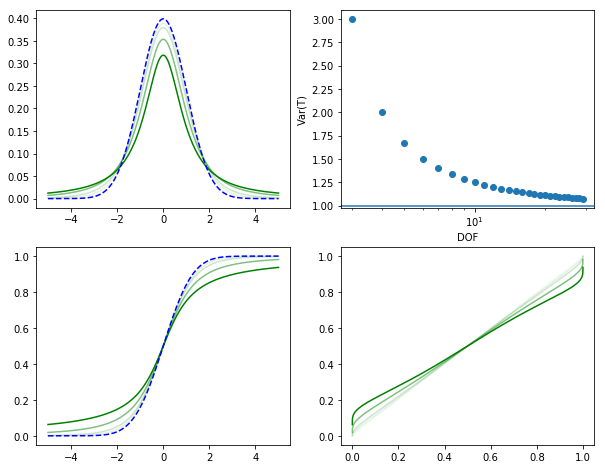

In [7]:
x = np.linspace(-5, 5, 200)
df_all = [1,2,5,10,30]

fh, ax = plt.subplots(2,2, figsize=(10,8))

# PDF
for df in df_all:
    c = 1/df
    ax[0,0].plot(x, stats.t.pdf(x, df), 'g', alpha=c)
    #plt.axhline(stats.t.pdf(0, df), color='g', alpha=c)
ax[0,0].plot(x, stats.norm.pdf(x), '--', color='b')

# CDF
for df in [1,2,5,10,30]:
    c = 1/df
    ax[1,0].plot(x, stats.t.cdf(x, df), 'g', alpha=c)
ax[1,0].plot(x, stats.norm.cdf(x), '--', color='b')

# Variance vs degrees of freedom
ax[0,1].semilogx(range(1,30), stats.t.var(range(1,30)), 'o')
ax[0,1].axhline(1) # Gaussian
ax[0,1].set_xlabel('DOF')
ax[0,1].set_ylabel('Var(T)')

# Q-Q plot (optional)
for df in [1,2,5,10,30]:
    c = 1/df
    ax[1,1].plot(stats.norm.cdf(x), stats.t.cdf(x, df), 'g', alpha=c)

plt.show()

### 3.2 Eggs
An egg producer claims to supply eggs with an average egg weight of 63 g. In a box of 12, the following weights were measured (all in g):

    62.75, 56.98, 53.30, 62.65, 57.63, 57.23, 56.65, 64.89, 57.87, 60.42, 57.01, 63.65
    
* Calculate the sample mean and (adjusted) sample standard deviation.

* What is the probability of obtaining this average weight or lighter, given the supplier's claim?


Probability of this sample mean (59.25) against claimed mean (63.00): 15.58 %


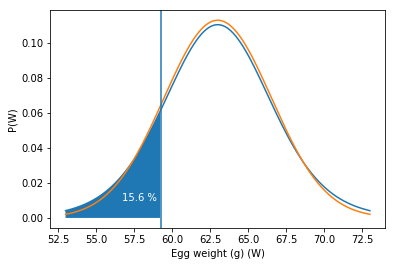

In [8]:
s = [62.75, 56.98, 53.30, 62.65, 57.63, 57.23, 56.65, 64.89, 57.87, 60.42, 57.01, 63.65]
n_samples = len(s)
dof = n_samples-1
mu_samp = np.mean(s)
sig_samp = np.std(s, ddof=1) #/np.sqrt(n_samples-1)
mu_claim = 63

x = np.linspace(mu_claim-10, mu_claim+10, 500)
fill_sel = x <= mu_samp

t_pdf = stats.t.pdf(x, dof, loc=mu_claim, scale=sig_samp)
p = stats.t.cdf(mu_samp, dof, loc=mu_claim, scale=sig_samp)

print('Probability of this sample mean ({:.2f}) against claimed mean ({:.2f}): {:.2f} %'.format(
    mu_samp, mu_claim, p*100))

plt.figure()
plt.plot(x, t_pdf)
plt.plot(x, stats.norm.pdf(x, mu_claim, sig_samp))
plt.fill_between(x[fill_sel], t_pdf[fill_sel])
plt.text(59, 0.01, '{:.1f} %'.format(100*p), color='white', horizontalalignment='right')
plt.axvline(mu_samp)
plt.xlabel('Egg weight (g) (W)')
plt.ylabel('P(W)')

plt.show()


* Within what range would 95% of samples follow? And how would this compare with an equivalent normal distribution?
* Plot again the two distributions, marking the 95% intervals

Normal: 57.19 to 68.81
T: 56.66 to 69.34


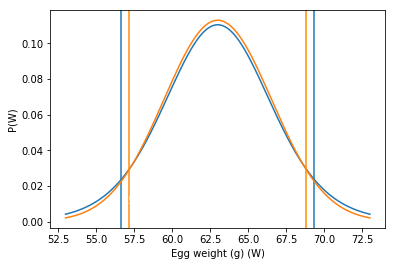

In [9]:
t_ppf = lambda pc : stats.t.ppf(pc, dof, loc=mu_claim, scale=sig_samp)
norm_ppf = lambda pc : stats.norm.ppf(pc, loc=mu_claim, scale=sig_samp)

def print_CI(dist, dfunc, cl=0.05, cu=0.95):
    print('{}: {:.2f} to {:.2f}'.format(dist, dfunc(cl), dfunc(cu)))
print_CI('Normal', norm_ppf)
print_CI('T', t_ppf)

plt.figure()
plt.plot(x, t_pdf)
plt.axvline(t_ppf(0.05))
plt.axvline(t_ppf(0.95))

plt.plot(x, stats.norm.pdf(x, mu_claim, sig_samp))
plt.axvline(norm_ppf(0.05), color='darkorange')
plt.axvline(norm_ppf(0.95), color='darkorange')

plt.text(59, 0.01, '{:.1f} %'.format(100*p), color='white', horizontalalignment='right')
plt.xlabel('Egg weight (g) (W)')
plt.ylabel('P(W)')


## Bonus
A pair of independent, standard normal random variables can be generated by sampling a uniform distribution. One approach to this is the Box-Muller transform (see https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform).

* Generate a long sequence of numbers drawn from U(0,1)
* Use the Box-Muller transform to convert these to normal random variables
* Plot the normal samples on a scatter plot - verify they are not correlated
* Plot the histograms, and superimpose the normal PDF


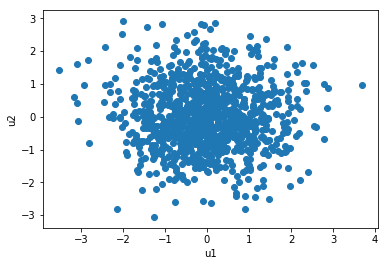

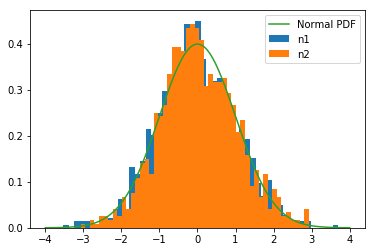

In [10]:
# Box Muller method
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)
x = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

z = np.linspace(-4,4,500)

plt.figure()
plt.scatter(x, y)
plt.xlabel('u1')
plt.ylabel('u2')

plt.figure()
plt.hist(x, 50, normed=True, label='n1')
plt.hist(y, 50, normed=True, label='n2')
plt.plot(z, stats.norm.pdf(z), label='Normal PDF')
plt.legend()

plt.show()


### Improbable events
In this example, we tabulate the amplitude deviation against the probability, odds (inverse probability), and equivalent timescale (once in 10 thousand years). Modify the code and try with different distributions - especially those which look similar to the normal distribution, but carry a fatter tail.

In [11]:
from IPython.display import display
import pandas as pd

def format_days(d):
    if d < 365:
        if d > 90:
            return '{:1.0f} months'.format(d/30)
        elif d > 7:
            return '{:1.0f} weeks'.format(d/7)
        else:
            return '{:1.0f} days'.format(d)
    d /= 365
    
    if d > 1e9:
        return '{:1.1f} billion years'.format(d*1e-9)
    elif d > 1e6:
        return '{:1.1f} million years'.format(d*1e-6)
    elif d > 1e3:
        return '{:1.1f} millenia'.format(d*1e-3)
    else:
        return '{:1.1f} years'.format(d)


z = np.linspace(0, 10, 500)

data = []
for n in range(1,8):
    p = 2*(1-stats.norm.cdf(n))
    data.append([n, p, 1/p, format_days(1/p)])
    
display(pd.DataFrame(data, columns=[r'|X| ($\sigma)$', 'p', '1 in', 'time equivalent']))


|X| ($\sigma)$             p          1 in    time equivalent
0               1  3.173105e-01  3.151487e+00             3 days
1               2  4.550026e-02  2.197789e+01            3 weeks
2               3  2.699796e-03  3.703983e+02          1.0 years
3               4  6.334248e-05  1.578719e+04         43.3 years
4               5  5.733031e-07  1.744278e+06       4.8 millenia
5               6  1.973175e-09  5.067973e+08  1.4 million years
6               7  2.559730e-12  3.906662e+11  1.1 billion years

### Code to generate "egg" distribution

In [12]:
# Generate small dataset for T-dist question
# True parameters:
sig = 3
mu = 58
n_samples = 12

s = stats.norm.rvs(size=n_samples, loc=mu, scale=sig)
print(('{:.2f}, '*n_samples).format(*s)[:-2])


55.30, 56.10, 52.49, 61.32, 50.20, 61.86, 61.05, 62.20, 59.52, 60.16, 56.32, 57.61
